# Dampled Oscillation

## Objective
Demonstrates ``dmp_osc_conv_gau``, ``dmp_osc_conv_cauchy``, ``dmp_osc_conv_pvoigt`` routine

``dmp_osc_conv_gau``: Computes the convolution of damped oscillation and gaussian function

``dmp_osc_conv_cauchy``: Computes the convolution of damped oscillation and cauchy function

``dmp_osc_conv_pvoigt``: Computes the convolution of damped oscillation and pseudo voigt function

Dampled oscillation is modeled to $\exp(-kt)\cos(2\pi t/T+\phi)$


In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from TRXASprefitpack import dmp_osc_conv_gau, dmp_osc_conv_cauchy, dmp_osc_conv_pvoigt
plt.rcParams["figure.figsize"] = (14,10)

## Condition

1. ``fwhm``: 0.15 ps
    
2. ``tau``: 10 ps
    
3. ``period``: 0.15 ps 0.3 ps 3 ps

4. ``phase``: 0
    
5. ``eta``: 0.3

In [2]:
fwhm = 0.15
tau = 10
period = [0.15, 0.3, 3]
phase_factor = 0
eta = 0.3

# time range
t_0 = np.arange(-2, -1, 0.2)
t_1 = np.arange(-1, 1, 0.02)
t_2 = np.arange(1, 3, 0.2)
t_3 = np.arange(3, 10, 0.5)
t_4 = np.arange(10, 54, 4)

t = np.hstack((t_0, t_1, t_2, t_3, t_4)) 

## ``dmp_osc_conv_gau`` routine

In [3]:
help(dmp_osc_conv_gau)

Help on function dmp_osc_conv_gau in module TRXASprefitpack.mathfun.exp_conv_irf:

dmp_osc_conv_gau(t: Union[float, numpy.ndarray], fwhm: float, k: float, T: float, phase: float) -> Union[float, numpy.ndarray]
    Compute damped oscillation convolved with normalized gaussian
    distribution
    
    Args:
      t: time
      fwhm: full width at half maximum of gaussian distribution
      k: damping constant (inverse of life time)
      T: period of vibration 
      phase: phase factor
    
    Returns:
     Convolution of normalized gaussian distribution and 
     damped oscillation :math:`(\exp(-kt)cos(2\pi t/T+phase))`.



In [4]:
gau_osc_1 = dmp_osc_conv_gau(t, fwhm, 1/tau, period[0], phase_factor)
gau_osc_2 = dmp_osc_conv_gau(t, fwhm, 1/tau, period[1], phase_factor)
gau_osc_3 = dmp_osc_conv_gau(t, fwhm, 1/tau, period[2], phase_factor)

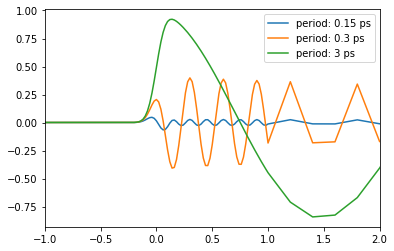

In [5]:
plt.plot(t, gau_osc_1, label=f'period: {period[0]} ps')
plt.plot(t, gau_osc_2, label=f'period: {period[1]} ps')
plt.plot(t, gau_osc_3, label=f'period: {period[2]} ps')
plt.legend()
plt.xlim(-1, 2)
plt.show()

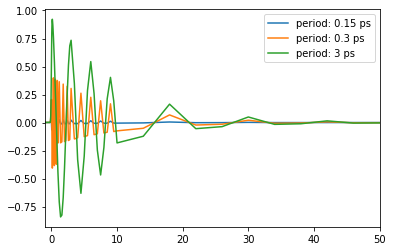

In [6]:
plt.plot(t, gau_osc_1, label=f'period: {period[0]} ps')
plt.plot(t, gau_osc_2, label=f'period: {period[1]} ps')
plt.plot(t, gau_osc_3, label=f'period: {period[2]} ps')
plt.legend()
plt.xlim(-1,50)
plt.show()

## ``dmp_osc_conv_cauchy`` routine

In [7]:
help(dmp_osc_conv_cauchy)

Help on function dmp_osc_conv_cauchy in module TRXASprefitpack.mathfun.exp_conv_irf:

dmp_osc_conv_cauchy(t: Union[float, numpy.ndarray], fwhm: float, k: float, T: float, phase: float) -> Union[float, numpy.ndarray]
    Compute damped oscillation convolved with normalized cauchy
    distribution
    
    Args:
      t: time
      fwhm: full width at half maximum of cauchy distribution
      k: damping constant (inverse of life time)
      T: period of vibration 
      phase: phase factor
    
    Returns:
     Convolution of normalized cauchy distribution and 
     damped oscillation :math:`(\exp(-kt)cos(2\pi t/T+phase))`.



In [8]:
cauchy_osc_1 = dmp_osc_conv_cauchy(t, fwhm, 1/tau, period[0], phase_factor)
cauchy_osc_2 = dmp_osc_conv_cauchy(t, fwhm, 1/tau, period[1], phase_factor)
cauchy_osc_3 = dmp_osc_conv_cauchy(t, fwhm, 1/tau, period[2], phase_factor)

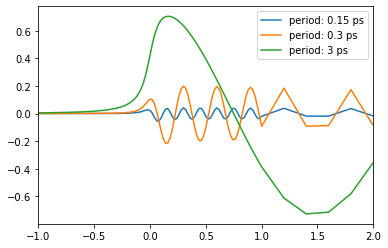

In [9]:
plt.plot(t, cauchy_osc_1, label=f'period: {period[0]} ps')
plt.plot(t, cauchy_osc_2, label=f'period: {period[1]} ps')
plt.plot(t, cauchy_osc_3, label=f'period: {period[2]} ps')
plt.legend()
plt.xlim(-1, 2)
plt.show()

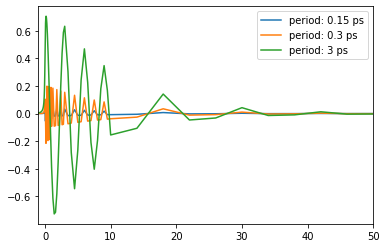

In [10]:
plt.plot(t, cauchy_osc_1, label=f'period: {period[0]} ps')
plt.plot(t, cauchy_osc_2, label=f'period: {period[1]} ps')
plt.plot(t, cauchy_osc_3, label=f'period: {period[2]} ps')
plt.legend()
plt.xlim(-1, 50)
plt.show()

## ``dmp_osc_conv_pvoigt``

In [11]:
help(dmp_osc_conv_pvoigt)

Help on function dmp_osc_conv_pvoigt in module TRXASprefitpack.mathfun.exp_conv_irf:

dmp_osc_conv_pvoigt(t: Union[float, numpy.ndarray], fwhm_G: float, fwhm_L: float, eta: float, k: float, T: float, phase: float) -> Union[float, numpy.ndarray]
    Compute damped oscillation convolved with normalized pseudo
    voigt profile (i.e. linear combination of normalized gaussian and
    cauchy distribution)
    
    :math:`\eta C(\mathrm{fwhm}_L, t) + (1-\eta)G(\mathrm{fwhm}_G, t)`
    
    Args:
       t: time
       fwhm_G: full width at half maximum of gaussian part of
               pseudo voigt profile
       fwhm_L: full width at half maximum of cauchy part of
               pseudo voigt profile
       eta: mixing parameter
       k: damping constant (inverse of life time)
       T: period of vibration 
       phase: phase factor
    
    Returns:
     Convolution of normalized pseudo voigt profile and
     damped oscillation :math:`(\exp(-kt)cos(2\pi t/T+phase))`.



In [12]:
pvoigt_osc_1 = dmp_osc_conv_pvoigt(t, fwhm, fwhm, eta, 1/tau, period[0], phase_factor)
pvoigt_osc_2 = dmp_osc_conv_pvoigt(t, fwhm, fwhm, eta, 1/tau, period[1], phase_factor)
pvoigt_osc_3 = dmp_osc_conv_pvoigt(t, fwhm, fwhm, eta, 1/tau, period[2], phase_factor)

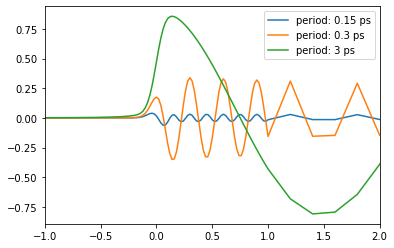

In [13]:
plt.plot(t, pvoigt_osc_1, label=f'period: {period[0]} ps')
plt.plot(t, pvoigt_osc_2, label=f'period: {period[1]} ps')
plt.plot(t, pvoigt_osc_3, label=f'period: {period[2]} ps')
plt.legend()
plt.xlim(-1, 2)
plt.show()

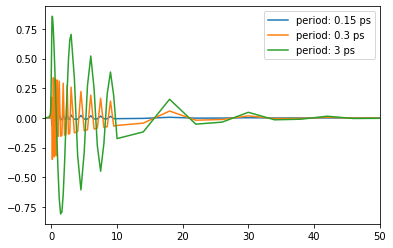

In [14]:
plt.plot(t, pvoigt_osc_1, label=f'period: {period[0]} ps')
plt.plot(t, pvoigt_osc_2, label=f'period: {period[1]} ps')
plt.plot(t, pvoigt_osc_3, label=f'period: {period[2]} ps')
plt.legend()
plt.xlim(-1, 50)
plt.show()

## Conclusion
1. When the value of ``period`` of oscillation is similar to or less than ``fwhm`` of gaussian probe pulse, It is hard to see oscillation feature.
2. Shown as ``IRF`` example, the shape of the convolution of cauchy irf and damped oscilliation is much broader than that of gaussian irf one.
3. Eventhough ``phase`` is 0, the oscillation peak near ``0`` is not the highest one when oscillation period ``T`` is comparable to ``fwhm``